In [27]:
import numpy as np
import pandas as pd
import os
import os.path as op
import matplotlib.pyplot as plt
import openneuro
from mne_bids import (BIDSPath, read_raw_bids, print_dir_tree, make_report, get_entity_vals)
import scipy
from mne.datasets import sample
import seaborn as sns
import mne
from bids_extract import bidsExtract

bids_path = r"C:\Users\eyala\Documents\GitHub\brainProj\ds003688"
dataset = "ds003688"
subject = "02"

In [28]:
# Download one subject's data from each dataset
bids_root = op.join(op.dirname(sample.data_path()), dataset)
print(bids_root)
test = bidsExtract(bids_root)
raw = test.get_raw()
#raw.plot() # plot the raw data
#plt.show()
#print(raw.info)
raw_selection = raw["F01", 0:]
x1=raw_selection[1]
y1=raw_selection[0].T
    
raw_selection = raw["F21", 0:]
x2=raw_selection[1]
y2=raw_selection[0].T
    
#plot the data
plt.plot(x1, y1)
plt.xlabel('time [s]')
plt.ylabel('signal')
#plt.show()
plt.plot(x2, y2)
plt.xlabel('time [s]')
plt.ylabel('signal')
plt.show()

C:\Users\Eyal Arad\mne_data\ds003688
Extracting parameters from C:\Users\Eyal Arad\mne_data\ds003688\sub-02\ses-iemu\ieeg\sub-02_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Reading events from C:\Users\Eyal Arad\mne_data\ds003688\sub-02\ses-iemu\ieeg\sub-02_ses-iemu_task-film_run-1_events.tsv.
Reading channel info from C:\Users\Eyal Arad\mne_data\ds003688\sub-02\ses-iemu\ieeg\sub-02_ses-iemu_task-film_acq-clinical_run-1_channels.tsv.
Reading electrode coords from C:\Users\Eyal Arad\mne_data\ds003688\sub-02\ses-iemu\ieeg\sub-02_ses-iemu_acq-clinical_electrodes.tsv.
['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48']


C:\Users\Eyal Arad\Documents\GitHub\brainProj\bids_extract.py:31: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  return mne_bids.read_raw_bids(bids_path)
C:\Users\Eyal Arad\Documents\GitHub\brainProj\bids_extract.py:31: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  return mne_bids.read_raw_bids(bids_path)
C:\Users\Eyal Arad\Documents\GitHub\brainProj\bids_extract.py:31: RuntimeWarning: The unit for channel(s) AH+ has changed from V to NA.
  return mne_bids.read_raw_bids(bids_path)


Given a signal (x,y), split it into sub-signals, each of which is a second long

512.0
Sub-signal 1: Duration=1.00 seconds
Sub-signal 2: Duration=1.00 seconds
Sub-signal 3: Duration=1.00 seconds
Sub-signal 4: Duration=1.00 seconds
Sub-signal 5: Duration=1.00 seconds
Sub-signal 6: Duration=1.00 seconds
Sub-signal 7: Duration=1.00 seconds
Sub-signal 8: Duration=1.00 seconds
Sub-signal 9: Duration=1.00 seconds
Sub-signal 10: Duration=1.00 seconds
Sub-signal 11: Duration=1.00 seconds
Sub-signal 12: Duration=1.00 seconds
Sub-signal 13: Duration=1.00 seconds
Sub-signal 14: Duration=1.00 seconds
Sub-signal 15: Duration=1.00 seconds
Sub-signal 16: Duration=1.00 seconds
Sub-signal 17: Duration=1.00 seconds
Sub-signal 18: Duration=1.00 seconds
Sub-signal 19: Duration=1.00 seconds
Sub-signal 20: Duration=1.00 seconds
Sub-signal 21: Duration=1.00 seconds
Sub-signal 22: Duration=1.00 seconds
Sub-signal 23: Duration=1.00 seconds
Sub-signal 24: Duration=1.00 seconds
Sub-signal 25: Duration=1.00 seconds
Sub-signal 26: Duration=1.00 seconds
Sub-signal 27: Duration=1.00 seconds
Sub-

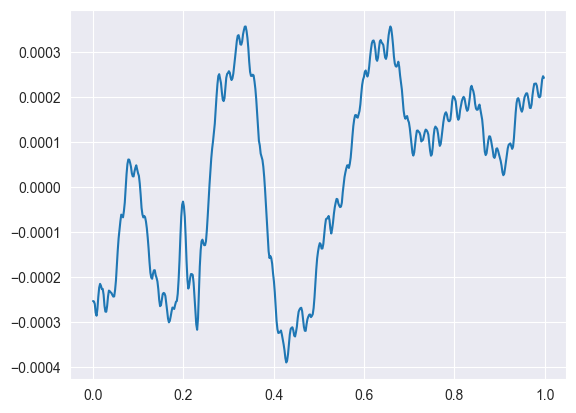

In [14]:
import numpy as np

def split_signal(signal, duration=1):
    x1, y1 = signal
    sample_rate = 1 / (x1[1] - x1[0])  # Assuming uniform sampling rate

    # Calculate the number of samples for the specified duration
    samples_per_subsignal = int(duration * sample_rate)

    # Calculate the total number of full sub-signals
    num_full_subsignals = len(x1) // samples_per_subsignal

    # Split the signal into sub-signals
    subsignals = [
        (x1[i*samples_per_subsignal:(i+1)*samples_per_subsignal],
         y1[i*samples_per_subsignal:(i+1)*samples_per_subsignal])
        for i in range(num_full_subsignals)
    ]

    return subsignals

# Example usage:
# Assuming x represents time and y represents the signal values
# Replace this example signal with your actual signal


signal = (x1, y1)
subsignals = split_signal(signal, duration=1)

# Print information about each sub-signal
for i, subsignal in enumerate(subsignals):
    print(f"Sub-signal {i+1}: Duration={subsignal[0][-1] - subsignal[0][0]:.2f} seconds")

# Access individual sub-signals if needed
# For example, access the first sub-signal
first_subsignal = subsignals[0]
#plot the first sub-signal
plt.plot(first_subsignal[0], first_subsignal[1])
#print("First Sub-signal:", first_subsignal)


creating coherence between two signals


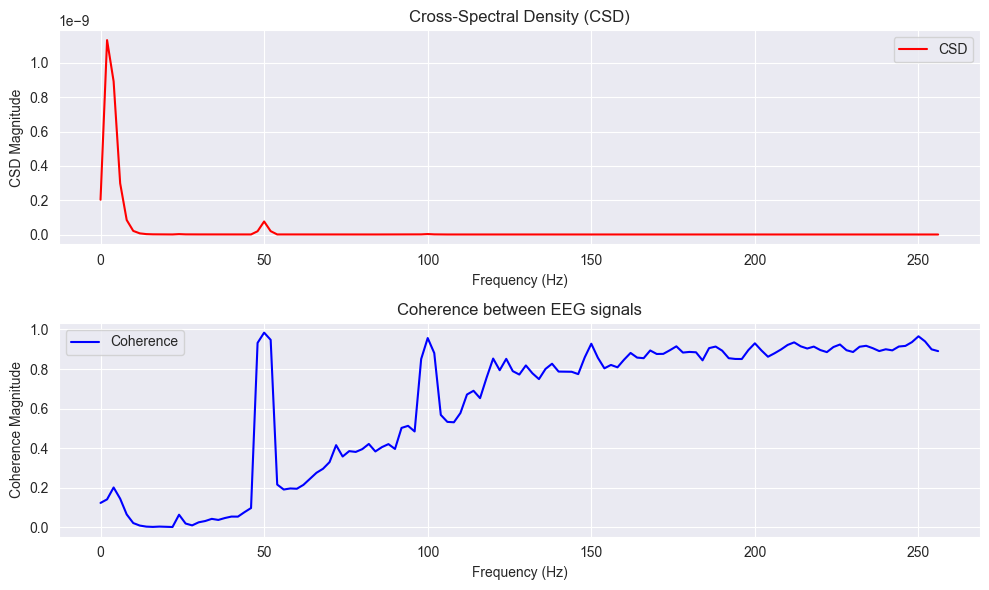

In [4]:
import numpy as np
from scipy.signal import csd, coherence
import matplotlib.pyplot as plt

# Assuming x1, y1, x2, y2 are your EEG signals
# Make sure that x1, x2 are the same for both signals


# Compute Cross-Spectral Density (CSD)
frequencies, csd_values = csd(y1.flatten(), y2.flatten(), fs=512.0)

# Compute Coherence
frequencies, coherence_values = coherence(y1.flatten(), y2.flatten(), fs=512.0)

# Plot Coherence
plt.figure(figsize=(10, 6)) # Increase size of plot.

plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(csd_values), 'r', label='CSD')
plt.title('Cross-Spectral Density (CSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('CSD Magnitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies, coherence_values, 'b', label='Coherence')
plt.title('Coherence between EEG signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence Magnitude')
plt.legend()

plt.tight_layout()
plt.show()


calculating the average coherence between two signals

 נדרש עבור שנייה - צריך לבצע התאמות ואז נקבל סט דאתא לאימון הרבה  יותר גדול

In [5]:
avg_coh = np.mean(coherence_values) # Average coherence across frequencies
print(avg_coh) # Print average coherence

0.6166438919301458
